In [1]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('C:\\Users\\noahd\\Documents\\hhdfdf.csv')

In [5]:
df.head()

,Unnamed: 0,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,continent,child_mortality_0_5_year_olds_dying_per_1000_born,life_expectancy_years
0,220,AFG,1800,603,Asia,468.58,28.21
1,221,AFG,1801,603,Asia,468.58,28.20
2,222,AFG,1802,603,Asia,468.58,28.19
3,223,AFG,1803,603,Asia,468.58,28.18
4,224,AFG,1804,603,Asia,468.58,28.17


In [20]:
dfreduced=df[['child_mortality_0_5_year_olds_dying_per_1000_born','life_expectancy_years','time','income_per_person_gdppercapita_ppp_inflation_adjusted']]

In [209]:
scaler = MinMaxScaler()

X=dfreduced['income_per_person_gdppercapita_ppp_inflation_adjusted']
Y1=dfreduced['life_expectancy_years']

scaler.fit(X.values.reshape(-1,1))
X=scaler.transform(X.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,Y1, test_size=.1)

lm = LinearRegression()
lm_fit = lm.fit(X_train, y_train)
lm_predict = lm_fit.predict(X_test)

ridge = Ridge()
ridge_fit = ridge.fit(X_train,y_train)
r_predict = ridge_fit.predict(X_test)

lasso = Lasso(max_iter=1000)
lasso_fit = lasso.fit(X_train,y_train)
l_predict = lasso_fit.predict(X_test)

ENet = ElasticNet(l1_ratio=.01)
ENet_fit = ENet.fit(X_train,y_train)
en_predict = ENet_fit.predict(X_test)

print('Linear Model MSE:' , mean_squared_error(y_test,lm_predict))
print('Ridge Model MSE:' , mean_squared_error(y_test,r_predict))
print('Lasso Model MSE:' , mean_squared_error(y_test,l_predict))
print('Elastic Net Model MSE:' , mean_squared_error(y_test,en_predict))


Linear Model MSE: 168.75964881746418
Ridge Model MSE: 168.90267101140435
Lasso Model MSE: 260.43751350274783
Elastic Net Model MSE: 259.8868309183112


C:\Users\noahd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


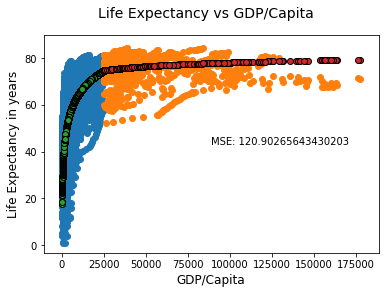

MSE: 120.90265643430203


In [252]:

lr = linear_model.LinearRegression()
y = dfreduced.life_expectancy_years
x= dfreduced.income_per_person_gdppercapita_ppp_inflation_adjusted.values.reshape(-1,1)

x_below_25000=[]
x_above_25000=[]
y_below_25000=[]
y_above_25000=[]
for i in range(len(x)):

    if x[i] <= 25000:
        x_below_25000.append(x[i])
        y_below_25000.append(y[i])
    else:
        x_above_25000.append(x[i])
        y_above_25000.append(y[i])

x_below_25000=np.array(x_below_25000)  
x_above_25000=np.array(x_above_25000)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_y_below = 19*(np.log(x_below_25000/100)**.8)
predicted_y_above = 53*(np.log(x_above_25000/100)**.2)


fig, ax = plt.subplots()



ax.scatter(x_below_25000, y_below_25000)
ax.scatter(x_above_25000, y_above_25000)
ax.scatter(x_below_25000, predicted_y_below, edgecolors=(0, 0, 0))
ax.scatter(x_above_25000, predicted_y_above, edgecolors=(0, 0, 0))
fig.suptitle('Life Expectancy vs GDP/Capita', fontsize=14)
plt.xlabel('GDP/Capita', fontsize=12)
plt.ylabel('Life Expectancy in years', fontsize=12)
#plt.text(8,3,'MSE: '+str(mean_squared_error(y_below_25000 ,predicted_y_below)+mean_squared_error(y_above_25000 ,predicted_y_above)),horizontalalignment='left')

plt.annotate('MSE: '+str(mean_squared_error(y_below_25000 ,predicted_y_below)+mean_squared_error(y_above_25000 ,predicted_y_above)), xy=(.5,0.5), xycoords='axes fraction')
fig.savefig('DS5500_Homework2_Problem4.jpg')
plt.show()


print('MSE:' , mean_squared_error(y_below_25000 ,predicted_y_below)+mean_squared_error(y_above_25000 ,predicted_y_above))



## Problem 5: Child Mortality Vs. GDP/Capita

In [245]:
X=dfreduced['income_per_person_gdppercapita_ppp_inflation_adjusted']
Y1=dfreduced['child_mortality_0_5_year_olds_dying_per_1000_born']


X=X.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,Y1, test_size=.1)

lm = LinearRegression()
lm_fit = lm.fit(X_train, y_train)
lm_predict = lm_fit.predict(X_test)

ridge = Ridge()
ridge_fit = ridge.fit(X_train,y_train)
r_predict = ridge_fit.predict(X_test)

lasso = Lasso(max_iter=1000)
lasso_fit = lasso.fit(X_train,y_train)
l_predict = lasso_fit.predict(X_test)

ENet = ElasticNet(l1_ratio=.01)
ENet_fit = ENet.fit(X_train,y_train)
en_predict = ENet_fit.predict(X_test)

print('Linear Model MSE:' , mean_squared_error(y_test,lm_predict))
print('Ridge Model MSE:' , mean_squared_error(y_test,r_predict))
print('Lasso Model MSE:' , mean_squared_error(y_test,l_predict))
print('Elastic Net Model MSE:' , mean_squared_error(y_test,en_predict))

Linear Model MSE: 19149.030334105828
Ridge Model MSE: 19149.03033410613
Lasso Model MSE: 19149.031704474495
Elastic Net Model MSE: 19149.030358720676


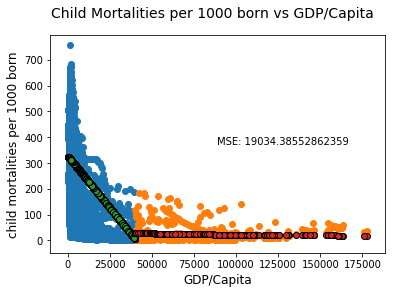

MSE: My model 19034.38552862359


In [253]:
lr = linear_model.LinearRegression()
y = dfreduced.child_mortality_0_5_year_olds_dying_per_1000_born
x= dfreduced.income_per_person_gdppercapita_ppp_inflation_adjusted.values.reshape(-1,1)

x_below_40000=[]
x_above_40000=[]
y_below_40000=[]
y_above_40000=[]
for i in range(len(x)):

    if x[i] <= 40000:
        x_below_40000.append(x[i])
        y_below_40000.append(y[i])
    else:
        x_above_40000.append(x[i])
        y_above_40000.append(y[i])

x_below_40000=np.array(x_below_40000)  
x_above_40000=np.array(x_above_40000)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_y_below = lm.predict(x_below_40000)
predicted_y_above = 700/x_above_40000**.3


fig, ax = plt.subplots()



ax.scatter(x_below_40000, y_below_40000)
ax.scatter(x_above_40000, y_above_40000)
ax.scatter(x_below_40000, predicted_y_below, edgecolors=(0, 0, 0))
ax.scatter(x_above_40000, predicted_y_above, edgecolors=(0, 0, 0))
fig.suptitle('Child Mortalities per 1000 born vs GDP/Capita', fontsize=14)
plt.xlabel('GDP/Capita', fontsize=12)
plt.ylabel('child mortalities per 1000 born', fontsize=12)
#plt.text(8,3,'MSE: '+str(mean_squared_error(y_below_25000 ,predicted_y_below)+mean_squared_error(y_above_25000 ,predicted_y_above)),horizontalalignment='left')

plt.annotate('MSE: '+str(mean_squared_error(y_below_40000 ,predicted_y_below)+mean_squared_error(y_above_40000 ,predicted_y_above)), xy=(.5,0.5), xycoords='axes fraction')
fig.savefig('DS5500_Homework2_Problem5.jpg')
plt.show()


print('MSE: My model' , mean_squared_error(y_below_40000 ,predicted_y_below)+mean_squared_error(y_above_40000 ,predicted_y_above))


